<a href="https://colab.research.google.com/github/0x31nose/Deep_Learning_Tutorial/blob/master/Creating_NeuralNetowork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ニューラルネットワークの作成
1. データセットの準備と整形
2. ニューラルネットワークの定義
3. 学習と制度の検証

### あやめのデータセットの読み込み

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
for idx, item in enumerate(zip(iris.data, iris.target)):
  if idx == 5:
    break
  print('data', item[0], 'target:', item[1])

data [5.1 3.5 1.4 0.2] target: 0
data [4.9 3.  1.4 0.2] target: 0
data [4.7 3.2 1.3 0.2] target: 0
data [4.6 3.1 1.5 0.2] target: 0
data [5.  3.6 1.4 0.2] target: 0


In [ ]:
from sklearn.model_selection import train_test_split
print("length of iris.data:", len(iris.data)) # iris.dataのデータ数
print("length of iris.target:", len(iris.target)) # iris.targetのデータ数

# iris.dataとiris.targetに含まれるデータをシャッフルして分割
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
print("length of X_train:", len(X_train))
print("length of y_train:", len(y_train))
print("length of X_test:", len(X_test))
print("length of y_test:", len(y_test))

length of iris.data: 150
length of iris.target: 150
length of X_train: 112
length of y_train: 112
length of X_test: 38
length of y_test: 38


In [ ]:
for idx, item in enumerate(zip(X_train, y_train)):
  if idx == 5:
    break
  print('data', item[0], 'target:', item[1])

data [6.4 2.7 5.3 1.9] target: 2
data [6.7 3.1 4.7 1.5] target: 1
data [5.2 3.4 1.4 0.2] target: 0
data [5.  2.3 3.3 1. ] target: 1
data [6.3 2.3 4.4 1.3] target: 1


In [ ]:
import torch

X_train = torch.from_numpy(X_train).float()
y_train = torch.tensor([[float(x)] for x in y_train])
X_test = torch.from_numpy(X_test).float()
y_test = torch.tensor([[float(x)] for x in y_test])

## ニューラルネットワークの作成
- ある層のノードが次の層の全てのノードと接続されるようなニューラルネットワークを作成する。
- PyTorchではLinearクラス（torch.nn.Linearクラス）を使うことで簡潔に記述できる。
- 以下では、入力データ→入力層→活性化関数→隠れ層→（出力層→）出力という流れを書いてみる

In [ ]:
# PyTorchが提供するtorch.nnモジュールをインポートする
from torch import nn

# 入力層、隠れ層、出力の数を変数に代入する
INPUT_FEATURES = 4
HIDDEN = 5
OUTPUT_FEATURES = 1

# nn.Moduleクラス（torch.nn.Moduleクラス）を基底クラスとする
# そうすることで、Pytorchが提供するニューラルネットワークのすべての機能を継承する
# その後に、__init__とforwardの２つのメソッドを定義する
class Net(nn.Module):
  #　基底クラスの__init__メソッドを呼び出して、初期化を行っている
  def __init__(self):
    super().__init__()
    # 入力層を表すインスタンス（入力層→隠れ層）
    self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
    # 隠れ層を表すインスタンス(隠れ層→出力層)
    self.fc2 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

  # ニューラルネットがどのように計算を連ねていくかを定める
  # 入力xを受け取り、self.fc1で処理し、
  # その結果をsigmoid関数（活性化関数）に通して、
  # self.fc2メソッドで処理して、その結果を戻り値としている
  def forward(self, x):
    x = self.fc1(x)
    x = torch.sigmoid(x)
    x = self.fc2(x)
    return x

In [ ]:
# とりあえず訓練してないけど使ってみるテスト
net = Net() #

outputs = net(X_train[0:3]) # 訓練データの先頭から３個の要素を入力
print(outputs)
for idx in range(3):
  print('output', outputs[idx], ', label:', y_train[idx])

tensor([[0.1658],
        [0.1883],
        [0.1674]], grad_fn=<AddmmBackward>)
output tensor([0.1658], grad_fn=<SelectBackward>) , label: tensor([2.])
output tensor([0.1883], grad_fn=<SelectBackward>) , label: tensor([1.])
output tensor([0.1674], grad_fn=<SelectBackward>) , label: tensor([0.])


### 学習
#### 学習の概要
- ニューラルネットワークにデータを入力
- 得られる計算結果（推測結果）と正解ラベルを比較
- ニューラルネットワークが持つ重みやバイアスを更新する
- 計算結果と正解ラベルとの誤差を比べる
- 最適化と呼ばれる処置を行う

#### 学習の手順
1. ニューラルネットワークにX_trainに格納したデータを入力する
2. 損失関数を用いて計算結果と正解ラベルとの誤差を計算する
3. 誤差逆伝播や最適化処理によって重みやバイアスを更新
4. １〜３を繰り返す

In [ ]:
net = Net()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.003)

EPOCHS = 3000
for epoch in range(EPOCHS):
  optimizer.zero_grad()
  outputs = net(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()

  if epoch % 100 == 99:
    print(f'epoch: {epoch+1:4}, loss: {loss.data}')

print('training finished')

epoch:  100, loss: 0.7983088493347168
epoch:  200, loss: 0.7308584451675415
epoch:  300, loss: 0.6923127770423889
epoch:  400, loss: 0.6568235158920288
epoch:  500, loss: 0.6203137040138245
epoch:  600, loss: 0.5828362703323364
epoch:  700, loss: 0.5435147881507874
epoch:  800, loss: 0.5014495253562927
epoch:  900, loss: 0.45674824714660645
epoch: 1000, loss: 0.4104413390159607
epoch: 1100, loss: 0.36405274271965027
epoch: 1200, loss: 0.31918439269065857
epoch: 1300, loss: 0.2772154211997986
epoch: 1400, loss: 0.23913535475730896
epoch: 1500, loss: 0.20550081133842468
epoch: 1600, loss: 0.17647695541381836
epoch: 1700, loss: 0.1519220918416977
epoch: 1800, loss: 0.13148507475852966
epoch: 1900, loss: 0.11469384282827377
epoch: 2000, loss: 0.10102833807468414
epoch: 2100, loss: 0.0899735614657402
epoch: 2200, loss: 0.08105500042438507
epoch: 2300, loss: 0.07385654002428055
epoch: 2400, loss: 0.06802808493375778
epoch: 2500, loss: 0.063283272087574
epoch: 2600, loss: 0.05939358472824097


In [ ]:
# 学習前に行った結果よりかは近しい値が出力されている。
for idx, item in enumerate(zip(outputs, y_train)):
  if idx == 5:
    break
  print(item[0].data, '<-->', item[1])

tensor([1.7280]) <--> tensor([2.])
tensor([1.2131]) <--> tensor([1.])
tensor([0.0104]) <--> tensor([0.])
tensor([1.0638]) <--> tensor([1.])
tensor([1.3280]) <--> tensor([1.])


In [ ]:
predict = (outputs + 0.5).int()
for idx, item in enumerate(zip(predict, y_train)):
  if idx == 5:
    break
  print('output:', item[0], ', label:', item[1])

output: tensor([2], dtype=torch.int32) , label: tensor([2.])
output: tensor([1], dtype=torch.int32) , label: tensor([1.])
output: tensor([0], dtype=torch.int32) , label: tensor([0.])
output: tensor([1], dtype=torch.int32) , label: tensor([1.])
output: tensor([1], dtype=torch.int32) , label: tensor([1.])


In [ ]:
compare = predict == y_train
print(compare[0:5])
print("Accuracy:", int(compare.sum())/112)

tensor([[True],
        [True],
        [True],
        [True],
        [True]])
Accuracy: 0.9910714285714286


In [ ]:
outputs = net(X_test)

predict = (outputs + 0.5).int()
compare = predict == y_test

print(f'correct: {compare.sum()} / {len(predict)}')
for value, label in zip(predict, y_test):
  print('predicted:', iris.target_names[value.item()], '<--->',
        'label:', iris.target_names[int(label.item())])

correct: 36 / 38
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> 

###  重みとバイアス

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch import nn

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train = torch.from_numpy(X_train).float()
y_train = torch.tensor([[float(x)] for x in y_train])
X_test = torch.from_numpy(X_test).float()
y_test = torch.tensor([[float(x)] for x in y_test])

INPUT_FEATURES = 4
HIDDEN = 5
OUTPUT_FEATURES = 1

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        return x

In [ ]:
x = X_train[0]
print('x:', x)

result = net.fc1.forward(x)
print(result)

x: tensor([6.5000, 3.0000, 5.5000, 1.8000])
tensor([-1.8548,  2.4616, -0.6701, -1.6588, -1.2566], grad_fn=<AddBackward0>)


In [ ]:
# Netクラスのインスタンスのインスタン変数FC１が持つ重みとバイアスを表示する
net = Net()

print('weight')
print(net.fc1.weight)
print('bias')
print(net.fc1.bias)

weight
Parameter containing:
tensor([[-0.2988, -0.2243,  0.0226,  0.2022],
        [ 0.3446,  0.2426,  0.0654, -0.3968],
        [-0.2145,  0.3671, -0.1642,  0.2808],
        [-0.2123, -0.1188, -0.0914,  0.3337],
        [ 0.2798, -0.4199, -0.4846,  0.3388]], requires_grad=True)
bias
Parameter containing:
tensor([ 0.2726, -0.1516,  0.0208, -0.0202,  0.2402], requires_grad=True)


In [ ]:
# 入力層の重みを変数wに、入力層のバイアスを変数bに代入しておく　
w = net.fc1.weight
b = net.fc1.bias

In [ ]:
o0 = w[0][0] * x[0] + w[0][1] * x[1] + w[0][2] * x[2] + w[0][3] * x[3] + b[0]
o1 = w[1][0] * x[0] + w[1][1] * x[1] + w[1][2] * x[2] + w[1][3] * x[3] + b[1]
o2 = w[2][0] * x[0] + w[2][1] * x[1] + w[2][2] * x[2] + w[2][3] * x[3] + b[2]
o3 = w[3][0] * x[0] + w[3][1] * x[1] + w[3][2] * x[2] + w[3][3] * x[3] + b[3]
o4 = w[4][0] * x[0] + w[4][1] * x[1] + w[4][2] * x[2] + w[4][3] * x[3] + b[4]
print(o0.data, o1.data, o2.data, o3.data, o4.data)

tensor(-1.8548) tensor(2.4616) tensor(-0.6701) tensor(-1.6588) tensor(-1.2566)


In [ ]:
o = w @ x + b
print(o)

tensor([-1.8548,  2.4616, -0.6701, -1.6588, -1.2566], grad_fn=<AddBackward0>)


In [ ]:
# 学習を一度だけ行い、入力層の重みとバイアスがどう変化したかを確認する
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

print('before learning')
print('weight')
print(net.fc1.weight)

print('learn once')
outputs = net(X_train)
loss = criterion(outputs, y_train)
loss.backward()
optimizer.step()

print('after learning')
print('weight')
print(net.fc1.weight)

before learning
weight
Parameter containing:
tensor([[-0.2988, -0.2243,  0.0226,  0.2022],
        [ 0.3446,  0.2426,  0.0654, -0.3968],
        [-0.2145,  0.3671, -0.1642,  0.2808],
        [-0.2123, -0.1188, -0.0914,  0.3337],
        [ 0.2798, -0.4199, -0.4846,  0.3388]], requires_grad=True)
learn once
after learning
weight
Parameter containing:
tensor([[-0.2835, -0.2171,  0.0345,  0.2064],
        [ 0.3273,  0.2344,  0.0520, -0.4015],
        [-0.1759,  0.3854, -0.1344,  0.2911],
        [-0.1890, -0.1077, -0.0733,  0.3400],
        [ 0.3230, -0.3993, -0.4516,  0.3502]], requires_grad=True)


# y = w * x で考えてみる

In [ ]:
import torch

w = torch.tensor([[1.95]], requires_grad=True) # aaa
t = torch.tensor([[2.0]]) # aaa
x = torch.tensor([1.0])

def f(x):
  return w * x

print('w:', w)
print('t:', t)

w: tensor([[1.9500]], requires_grad=True)
t: tensor([[2.]])


### 平均二乗誤差を考える
- MSE：　Mean Squared Error
- 同じインデックス位置にある２つの要素で減算を行った結果を二乗する
- それらの要素の誤差として考え、ベクトルの全要素についてそれらを計算する
- それらの総和を要素数で割った値を求める


In [ ]:

criterion = torch.nn.MSELoss()

y = f(x)
loss = criterion(y, t)
print(loss.data)

tensor(0.0025)


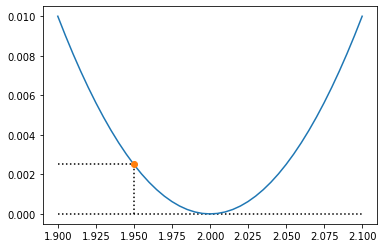

In [ ]:
# 損失を計算する関数
# 勾配がマイナスなら重みを増加させて、プラスなら減少させていけばよい。
import matplotlib.pyplot as plt

def calc_loss(output, label):
    return (output - label) ** 2

# 1.9～2.1の範囲の重みwに対し、関数f(x)にx＝1を与えたときの計算結果
output = torch.arange(1.9, 2.1, 0.005)

LABEL = 2

myloss = calc_loss(output, LABEL)
plt.plot(output, myloss)
plt.plot(1.95, calc_loss(1.95, LABEL), marker='o')
plt.hlines(0, 1.9, 2.1, linestyle=':')
plt.hlines(0.0025, 1.9, 1.95, linestyle=':')
plt.vlines(1.95, 0, 0.0025, linestyle=':')
plt.show()